In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving CO_Monthly.csv to CO_Monthly.csv


In [ ]:
df=pd.read_csv('CO_Monthly.csv')

In [ ]:
df.head()

,DATE,CO,Forecast
0,2019/1/1,0.037,NaN
1,2019/2/1,0.037,NaN
2,2019/3/1,0.039,NaN
3,2019/4/1,0.039,NaN
4,2019/5/1,0.038,NaN


In [ ]:
df.tail()

,DATE,CO,Forecast
30,2021/7/1,0.030,NaN
31,2021/8/1,0.032,NaN
32,2021/9/1,0.030,NaN
33,2021/10/1,0.033,NaN
34,2021/11/1,0.037,NaN


In [ ]:
## Cleaning up the data
df.columns=["DATE","CO","Forecast"]
df.head()

,DATE,CO,Forecast
0,2019/1/1,0.037,NaN
1,2019/2/1,0.037,NaN
2,2019/3/1,0.039,NaN
3,2019/4/1,0.039,NaN
4,2019/5/1,0.038,NaN


In [ ]:
df.tail()

,DATE,CO,Forecast
30,2021/7/1,0.030,NaN
31,2021/8/1,0.032,NaN
32,2021/9/1,0.030,NaN
33,2021/10/1,0.033,NaN
34,2021/11/1,0.037,NaN


In [ ]:
# Convert Month into Datetime
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,CO,Forecast
0,2019-01-01,0.037,NaN
1,2019-02-01,0.037,NaN
2,2019-03-01,0.039,NaN
3,2019-04-01,0.039,NaN
4,2019-05-01,0.038,NaN


In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df.head()

,CO,Forecast
DATE,,
2019-01-01,0.037,NaN
2019-02-01,0.037,NaN
2019-03-01,0.039,NaN
2019-04-01,0.039,NaN
2019-05-01,0.038,NaN


In [ ]:
df.describe()

,CO,Forecast
count,35.000000,0.0
mean,0.035343,NaN
std,0.004072,NaN
min,0.029000,NaN
25%,0.032000,NaN
50%,0.037000,NaN
75%,0.038500,NaN
max,0.043000,NaN


## Step 2: Visualize the Data

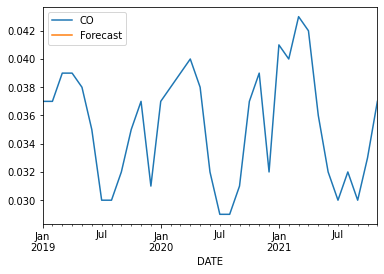

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['CO'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(CO):
    result=adfuller(CO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['CO'])

ADF Test Statistic : -4.43919692014423
p-value : 0.00025284542047458817
#Lags Used : 7
Number of Observations Used : 27
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
df['Seasonal First Difference']=df['CO']-df['CO'].shift(12)

In [ ]:
df.head(14)

,CO,Forecast,Seasonal First Difference
DATE,,,
2019-01-01,0.037,NaN,NaN
2019-02-01,0.037,NaN,NaN
2019-03-01,0.039,NaN,NaN
2019-04-01,0.039,NaN,NaN
2019-05-01,0.038,NaN,NaN
2019-06-01,0.035,NaN,NaN
2019-07-01,0.030,NaN,NaN
2019-08-01,0.030,NaN,NaN
2019-09-01,0.032,NaN,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.6086748979347547
p-value : 0.005597331678616175
#Lags Used : 8
Number of Observations Used : 14
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


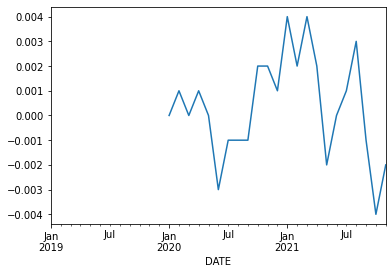

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

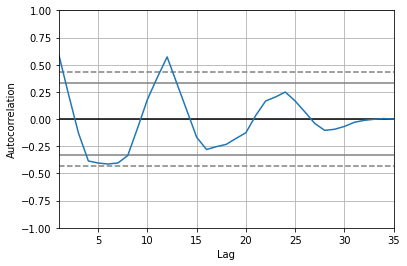

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['CO'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
import statsmodels.api as sm

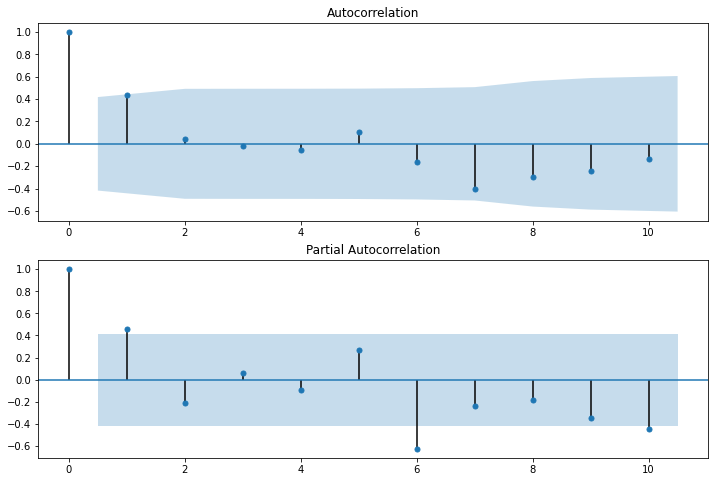

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['CO'],order=(1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     CO   No. Observations:                   35
Model:                     ARMA(1, 1)   Log Likelihood                 151.333
Method:                       css-mle   S.D. of innovations              0.003
Date:                Fri, 09 Dec 2022   AIC                           -294.666
Time:                        11:47:52   BIC                           -288.444
Sample:                    01-01-2019   HQIC                          -292.518
                         - 11-01-2021                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0355      0.001     30.308      0.000       0.033       0.038
ar.L1.CO       0.4640      0.213      2.177      0.029       0.046       0.882
ma.L1.CO       0.1971      0.221      0.893      0.372      -0.235       0.630
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1553           +0.0000j            2.1553            0.0000
MA.1           -5.0728           +0.0000j            5.0728            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['CO'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


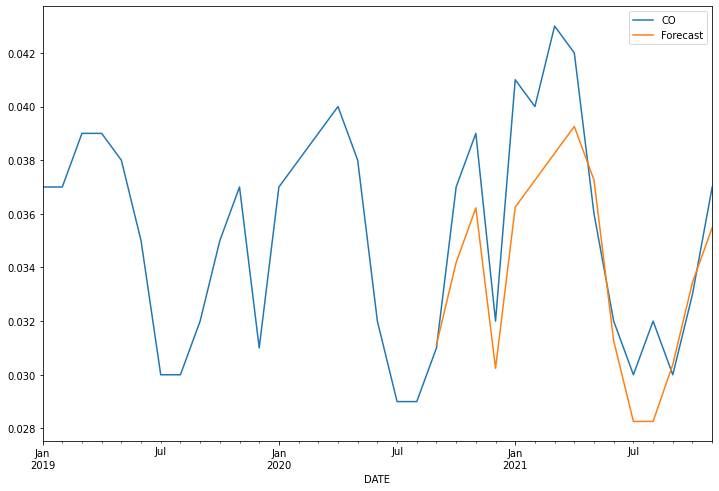

In [ ]:
df['Forecast']=results.predict(start=20,end=65,dynamic=True)
df[['CO','Forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,CO,Forecast,Seasonal First Difference
2023-06-01,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

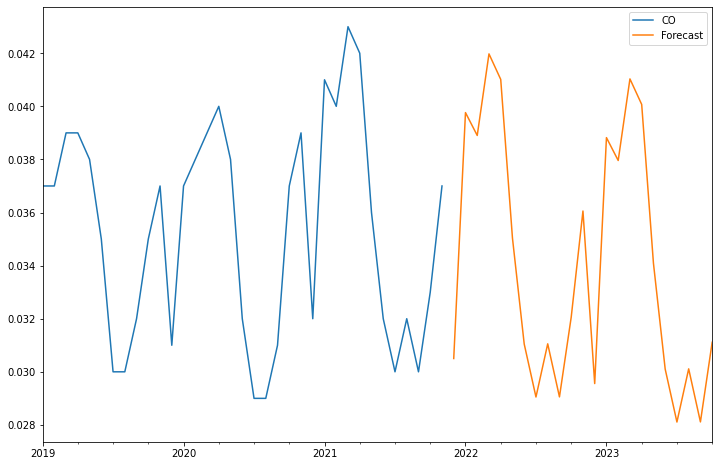

In [ ]:
future_df['Forecast'] = results.predict(start = 35, end = 70, dynamic= True)  
future_df[['CO', 'Forecast']].plot(figsize=(12,8)) 

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(df['CO']))
print(rmse)

TypeError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd

In [ ]:
y = df['CO']

In [ ]:
x = df['Forecast']

In [ ]:
x = sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y,x).fit()

MissingDataError: ignored